In [39]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import math
import numpy as np
from torch.autograd import Variable

In [40]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [41]:
def get_data():
    training_data = torchvision.datasets.MNIST(root = 'data',
                                               train = True,
                                               transform = transforms.ToTensor(),
                                               download = True)
    testing_data = torchvision.datasets.MNIST(root = 'data',
                                              train = False,
                                              transform = transforms.ToTensor(),
                                              download=True)
    return training_data, testing_data

In [42]:
def get_loaders(training_data, testing_data, batch_size):
    training_loader = torch.utils.data.DataLoader(dataset = training_data,
                                                  batch_size = batch_size,
                                                  shuffle = True)
    testing_loader = torch.utils.data.DataLoader(dataset = testing_data,
                                                 batch_size = batch_size,
                                                 shuffle = True)
    return training_loader, testing_loader

In [43]:
def print_image(image_tensor):
    plt.imshow(image_tensor[0].detach(), cmap="gray")
    plt.show()

In [44]:
#class CustomReLU:
#    def run(self, input_tensor):
#        return torch.where(input_tensor > 0, input_tensor, 0)
#
#class CustomLeakyReLU:
#    def run(self, input_tensor):
#        return torch.where(input_tensor > 0, input_tensor, input_tensor * 0.01)

In [45]:
class CNN(nn.Module):
    def __init__(self, num_classes):
        super(CNN, self).__init__()
        self.conv_layer0 = nn.Conv2d(in_channels=1, out_channels=5, kernel_size=5, stride=1, padding=2)
        self.relu = nn.ReLU()
        #self.custom_relu = CustomReLU()
        #self.custom_leaky_relu = CustomLeakyReLU()
        self.max_pool = nn.MaxPool2d(2) 
        self.conv_layer1 = nn.Conv2d(in_channels=5, out_channels=5, kernel_size=5, stride=1, padding=2)                
        self.out = nn.Linear(5 * 7 * 7, num_classes)
    
    def forward(self, x):
        x = self.conv_layer0(x)
        x = self.relu(x)   
        x = self.max_pool(x)
        x = self.conv_layer1(x)
        x = self.relu(x)          
        x = self.max_pool(x)
        x = x.view(x.size(0), -1)       
        output = self.out(x)
        return output

In [46]:
def train(num_epochs, model, criterion, optimizer, training_loader):
    
    model.train()
    for epoch in range(num_epochs):
        num_correct = 0
        running_loss = 0.0
        for i, (images, labels) in enumerate(training_loader):
            optimizer.zero_grad() 
            output = model.forward(images)              
            loss = criterion(output, labels)
            running_loss += loss.item()
            
            _, predictions = torch.max(output.data, 1)
            num_correct += (predictions == labels).sum().item()
                      
            loss.backward()    
            optimizer.step()  
           
        loss = running_loss/len(training_loader.dataset) 
        accuracy = num_correct/len(training_loader.dataset)  
        print("Epoch: " + str(epoch) + ", Loss: " + str(loss) + ", Accuracy: " + str(accuracy))

In [47]:
def test(model, criterion, testing_loader):
    model.eval()
    num_correct = 0
    running_loss = 0.0
       
    for i, (images, labels) in enumerate(testing_loader):
                
        output = model.forward(images)
        loss = criterion(output, labels)
        running_loss += loss.item()
        
        _, predictions = torch.max(output.data, 1)
        num_correct += (predictions == labels).sum().item()
    
    loss = running_loss/len(testing_loader.dataset)
    accuracy = num_correct/len(testing_loader.dataset)
    print("Loss: " + str(loss) + ", Accuracy: " + str(accuracy))

In [48]:
training_data, testing_data = get_data()
print("Training data length: " + str(len(training_data)))
print("Test data length: " + str(len(testing_data)))

training_loader, testing_loader = get_loaders(training_data, testing_data, 20)

Training data length: 60000
Test data length: 10000


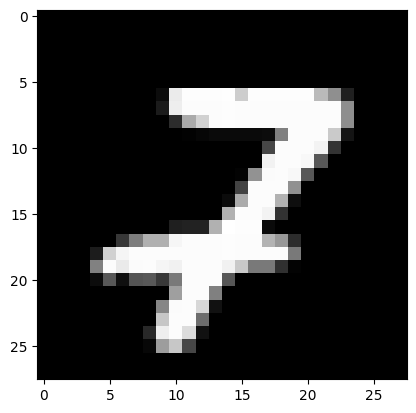

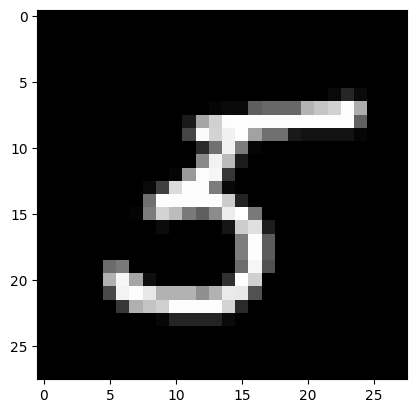

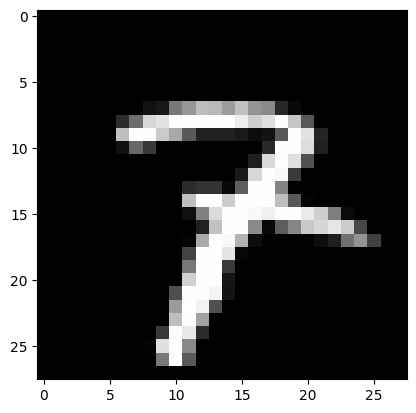

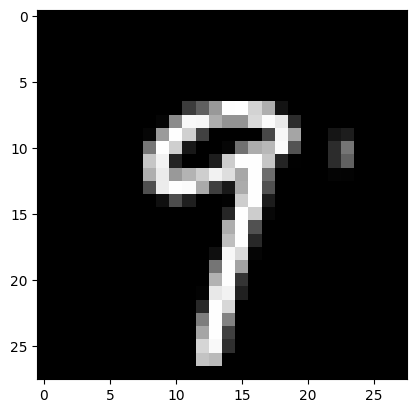

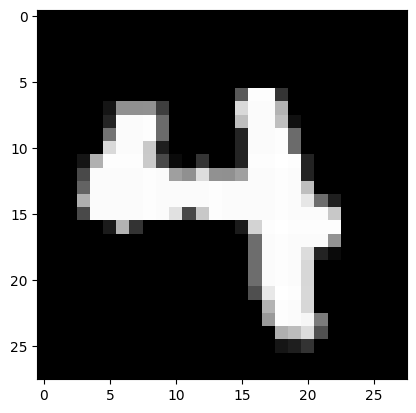

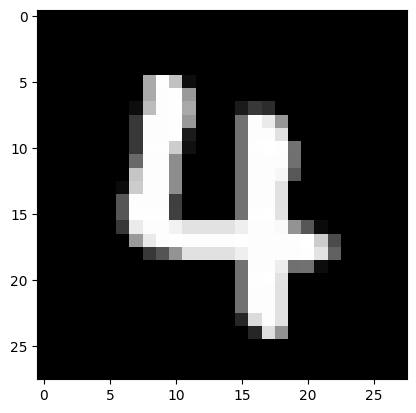

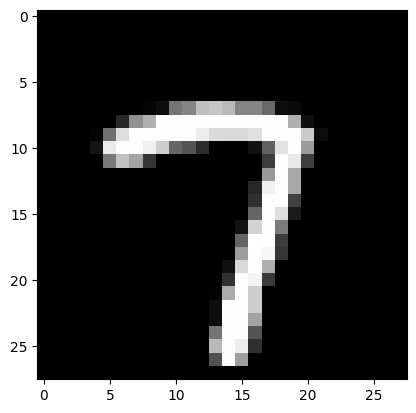

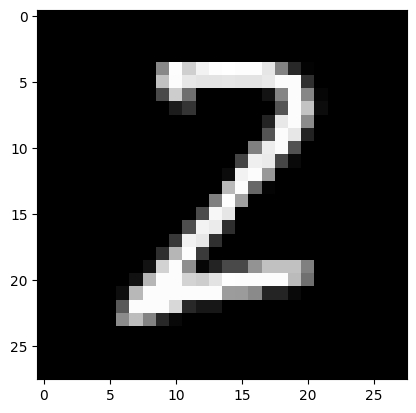

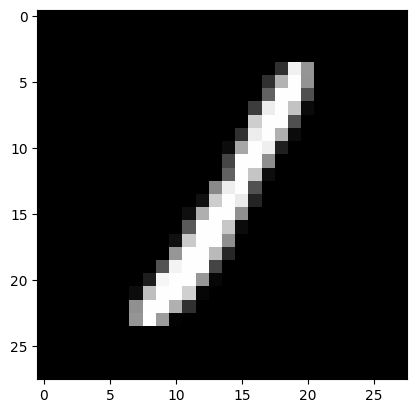

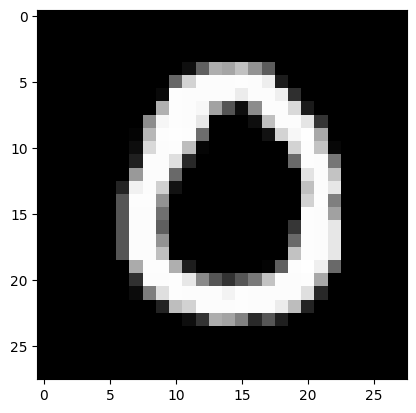

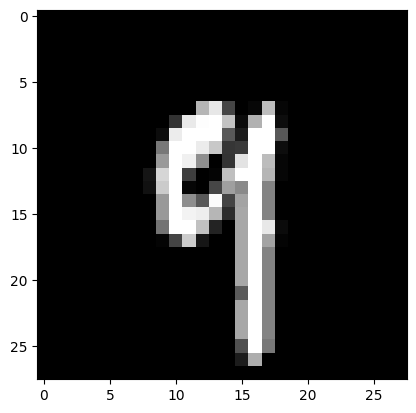

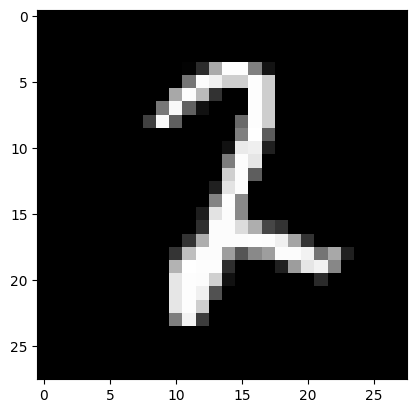

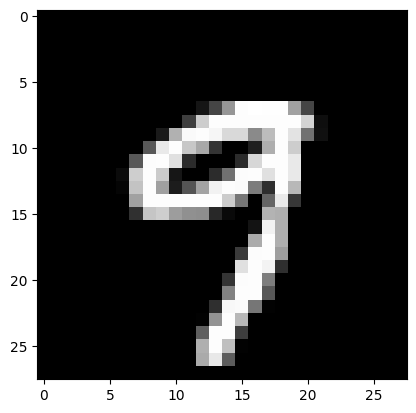

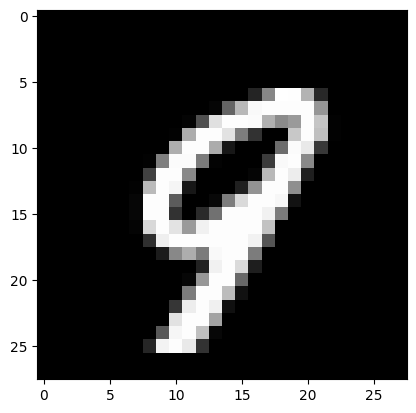

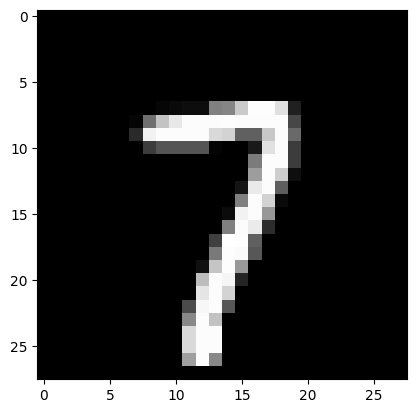

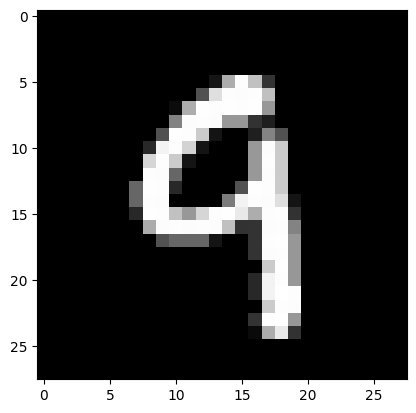

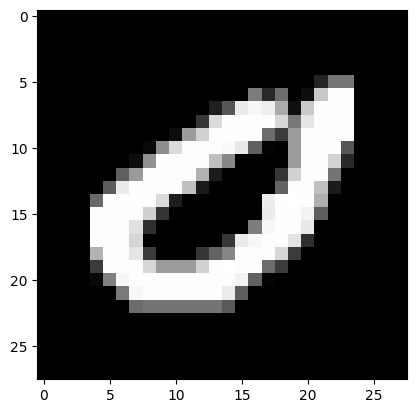

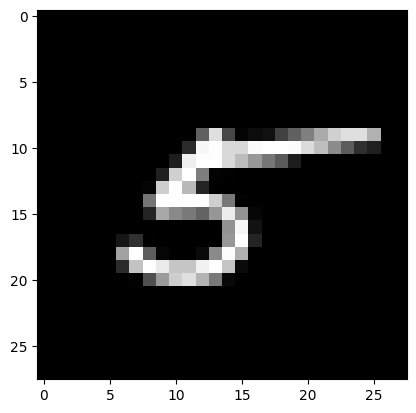

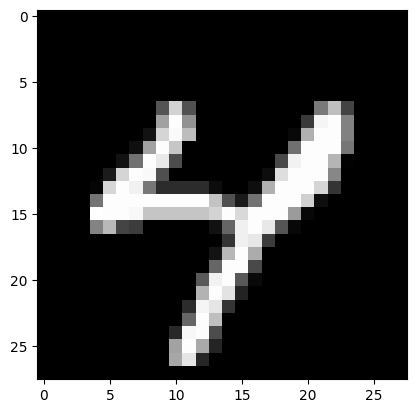

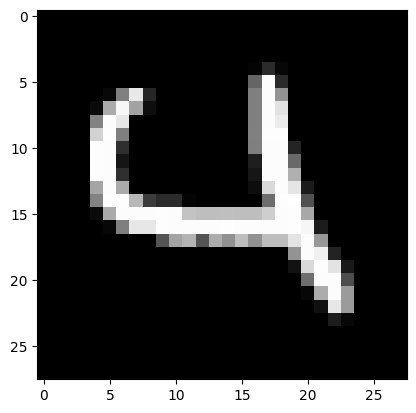

In [49]:
images, labels = next(iter(training_loader))
for image in images:
    print_image(image)

In [50]:
num_classes = 10
cnn = CNN(num_classes)
num_epochs = 3
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn.parameters(), lr = 0.01)

In [51]:
train(num_epochs, cnn, criterion, optimizer, training_loader)

Epoch: 0, Loss: 0.008038718570511992, Accuracy: 0.9495
Epoch: 1, Loss: 0.0053327967756332025, Accuracy: 0.96805
Epoch: 2, Loss: 0.0052530921724203835, Accuracy: 0.96875


In [52]:
test(cnn, criterion, testing_loader)

Loss: 0.004199876517042867, Accuracy: 0.972


In [53]:
images, labels = next(iter(testing_loader))
output = cnn.forward(images)
_, predictions = torch.max(output.data, 1)

print("Labels: " + str(labels))
print("Predictions: " + str(predictions))

Labels: tensor([9, 6, 8, 0, 9, 1, 4, 5, 2, 1, 3, 6, 2, 7, 3, 0, 4, 1, 2, 2])
Predictions: tensor([9, 6, 8, 0, 9, 1, 4, 5, 2, 1, 3, 6, 2, 7, 3, 0, 4, 1, 2, 2])


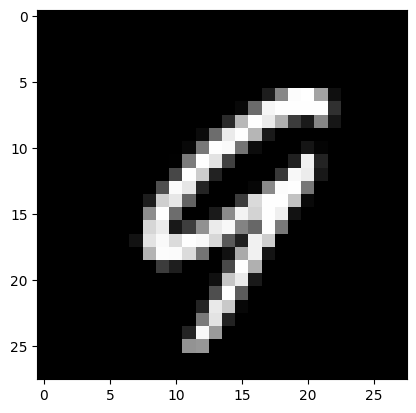

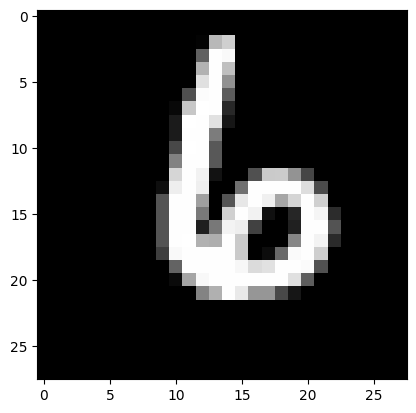

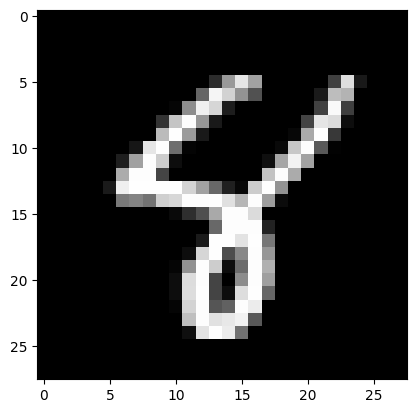

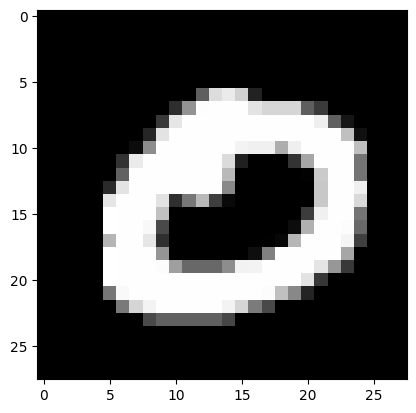

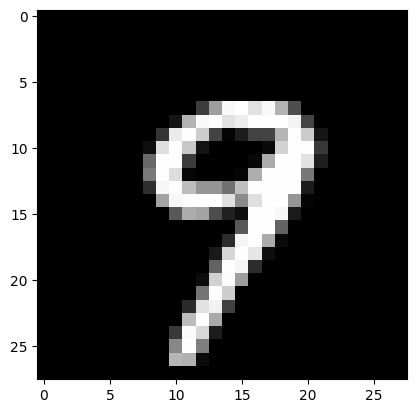

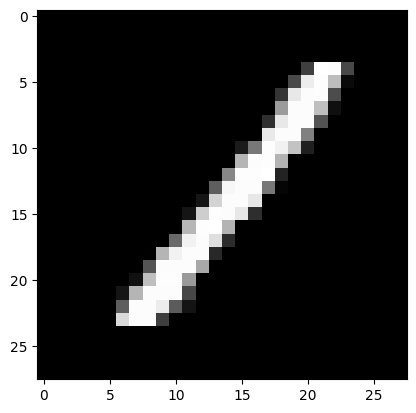

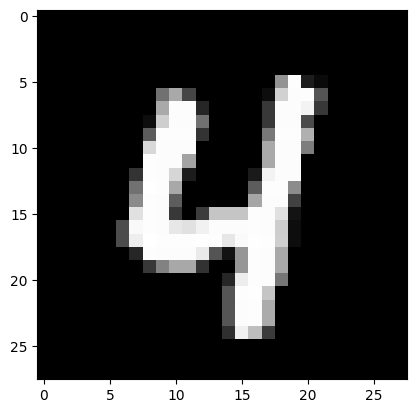

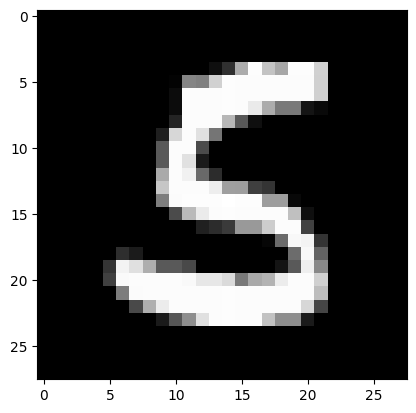

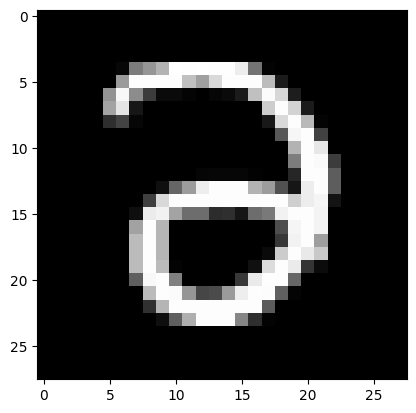

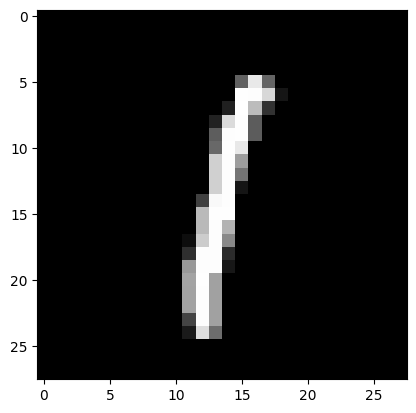

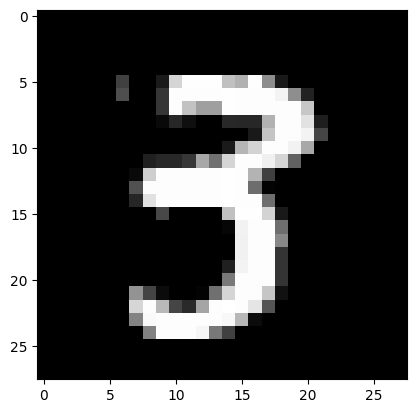

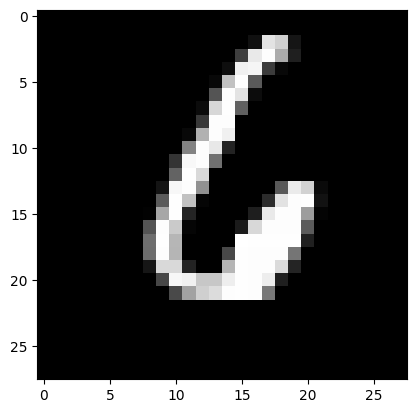

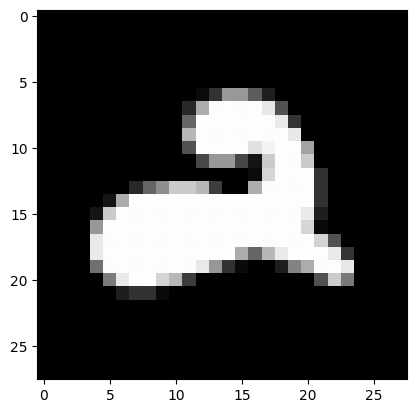

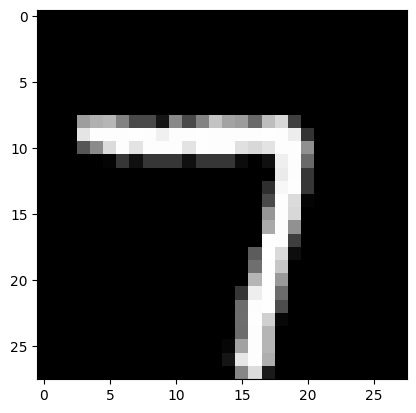

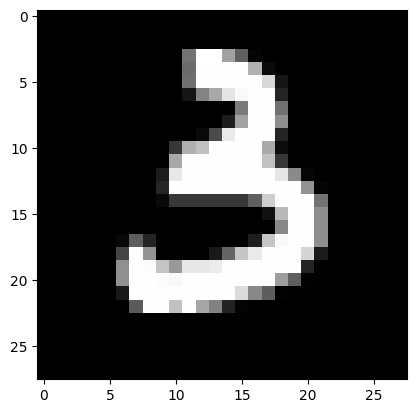

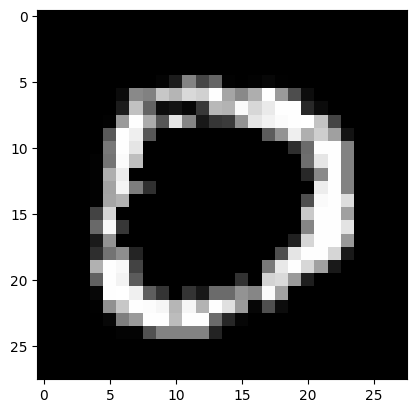

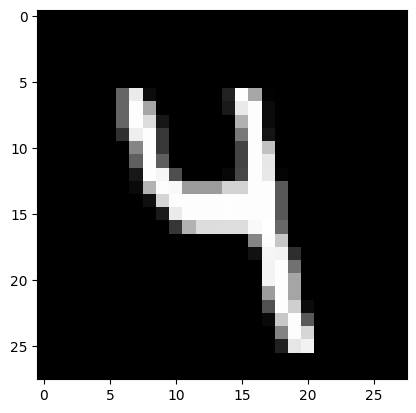

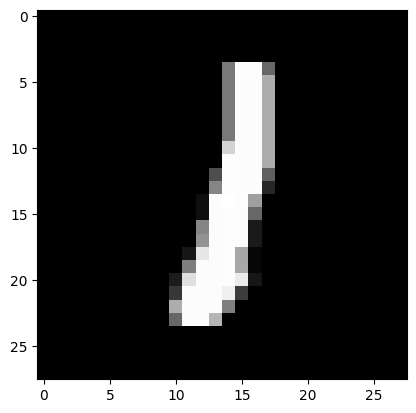

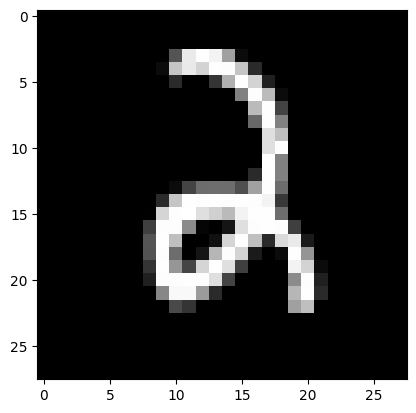

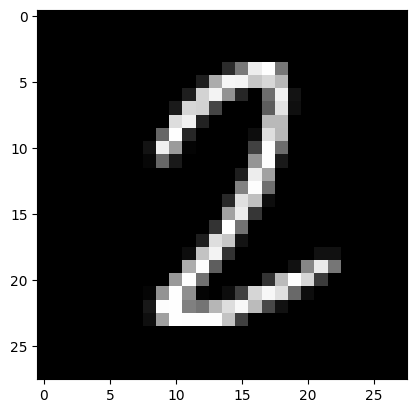

In [54]:
for image in images:
    print_image(image)